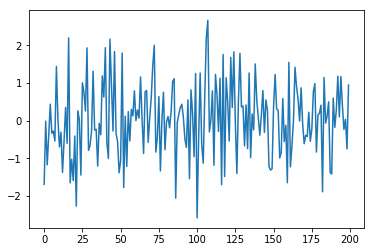

In [3]:
# Import key packsges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# define to generate a list of numbers
def gen_num(n):
    a_list = []
    for i in range(n):        
        # generate random number
        random_num = np.random.randn()
        a_list.append(random_num)
    
    return a_list

# Call gen_num function with user value
# get user input
num_entered = input('Enter a Number\n')
formated_int = int(num_entered)
data = gen_num(formated_int)
# plot the data in a bar graph
plt.plot(data)
plt.show()
    
    

In [4]:
!pip install linearmodels

     |████████████████████████████████| 1.5 MB 79 kB/s 
     |████████▊                       | 2.3 MB 70 kB/s eta 0:01:30ERROR: Exception:
Traceback (most recent call last):
  File "/home/franklin/anaconda3/lib/python3.6/site-packages/pip/_vendor/urllib3/contrib/pyopenssl.py", line 313, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/home/franklin/anaconda3/lib/python3.6/site-packages/OpenSSL/SSL.py", line 1625, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "/home/franklin/anaconda3/lib/python3.6/site-packages/OpenSSL/SSL.py", line 1431, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/franklin/anaconda3/lib/python3.6/site-packages/pip/_vendor/urllib3/contrib/pyopenssl.py", line 313, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/home/franklin/anaconda3/lib/python3.6/sit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [7]:
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


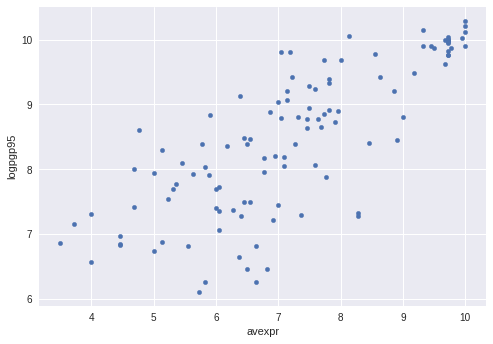

In [9]:
plt.style.use('seaborn')

df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

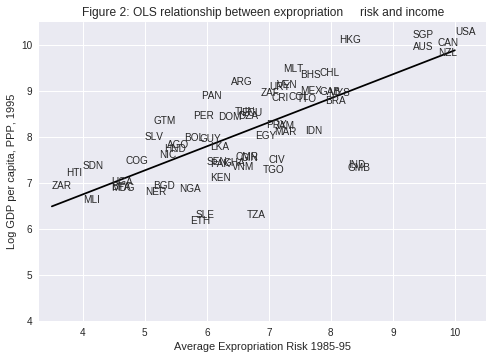

In [10]:
# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlim([3.3,10.5])
ax.set_ylim([4,10.5])
ax.set_xlabel('Average Expropriation Risk 1985-95')
ax.set_ylabel('Log GDP per capita, PPP, 1995')
ax.set_title('Figure 2: OLS relationship between expropriation \
    risk and income')
plt.show()

In [11]:
df1['const'] = 1

In [12]:
reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [13]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           4.16e-24
Time:                        21:21:46   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

In [16]:
mean_expr = np.mean(df1_subset['avexpr'])
mean_expr

6.515625

In [17]:
predicted_logpdp95 = 4.63 + 0.53 * 7.07
predicted_logpdp95

8.3771

In [18]:
results.predict(exog=[1, mean_expr])

array([8.09156367])

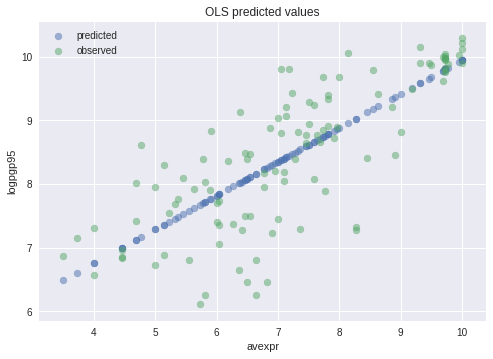

In [19]:
# Drop missing observations from whole sample

df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')
plt.show()